# Prepare and visualize data
## Import libraries




In [1]:
import pandas as pd
import plotly.graph_objects as go

## Import data

### Kieler Woche

In [22]:
import datetime

df_kiwo = pd.read_csv('../data/kiwo.csv')#, header=0, parse_dates=[0], index_col=0, squeeze=True)
df_kiwo.head()
#print(type(df_kiwo))

Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1

In [23]:
def fill_in_missing_dates(df, date_col_name = 'date',date_order = 'asc', fill_value = 0):
    idx = pd.date_range(min(df[date_col_name]), max(df[date_col_name]), freq = "D")
    df.set_index(date_col_name,drop=True,inplace=True)
    df.index = pd.DatetimeIndex(df.index)    
    df = df.reindex(idx,fill_value=fill_value)
    #df[date_col_name] = pd.DatetimeIndex(df.index)
    return df

df_kiwo = fill_in_missing_dates(df_kiwo, date_col_name = 'Datum', fill_value = 0)
df_kiwo

KielerWoche
2012-06-16            1
2012-06-17            1
2012-06-18            1
2012-06-19            1
2012-06-20            1
...                 ...
2019-06-26            1
2019-06-27            1
2019-06-28            1
2019-06-29            1
2019-06-30            1

[2571 rows x 1 columns]

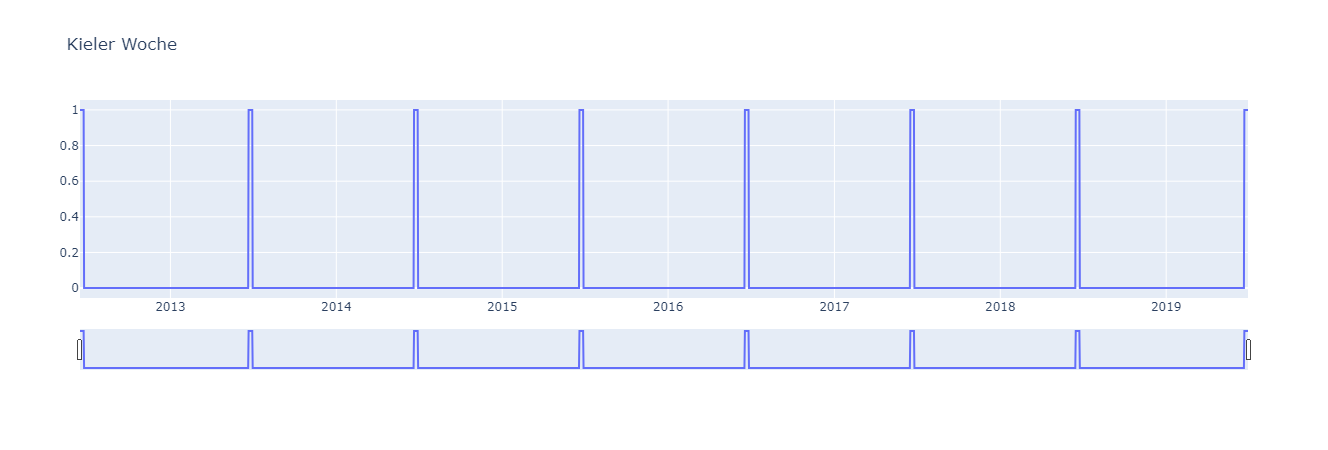

In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_kiwo.index, y=df_kiwo['KielerWoche'], name="Category 1"))

fig.update_layout(title_text='Kieler Woche',
                  xaxis_rangeslider_visible=True)
fig.show()

### Sales

In [26]:
df_sales_raw = pd.read_csv('../data/umsatzdaten_gekuerzt.csv')#, header=0, parse_dates=[0], index_col=0, squeeze=True)
df_sales_raw.head()
#print(type(df_sales))

Datum  Warengruppe      Umsatz
0  2013-07-01            1  148.828353
1  2013-07-02            1  159.793757
2  2013-07-03            1  111.885594
3  2013-07-04            1  168.864941
4  2013-07-05            1  171.280754

In [49]:
def get_category_from_sales(df, code, category):
    # get values from data frame with specific category ("Warengruppe")
    df_category = df[df.Warengruppe == code]
    
    # delete column
    df_category.drop("Warengruppe", axis=1, inplace=True)
    
    # transfer to series type
    df_category.set_index('Datum', inplace=True)
    
    # rename column name
    df_category.rename(columns=lambda x: 'Sales_' + str(category), inplace=True)
    
    return df_category

In [75]:
# 
df_sales_1 = get_category_from_sales(df_sales_raw, 1, 'Brot')
df_sales_2 = get_category_from_sales(df_sales_raw, 2, 'Broetchen')
df_sales_3 = get_category_from_sales(df_sales_raw, 3, 'Croissant')
df_sales_4 = get_category_from_sales(df_sales_raw, 4, 'Konditorei')
df_sales_5 = get_category_from_sales(df_sales_raw, 5 ,'Kuchen')
df_sales_6 = get_category_from_sales(df_sales_raw, 6 ,'Saisonbrot')

df_sales_2.head()

Sales_Broetchen
Datum                      
2013-07-01       535.856285
2013-07-02       546.780787
2013-07-03       427.343259
2013-07-04       454.859641
2013-07-05       492.818804

In [76]:
from functools import reduce

df_list = [df_sales_1, df_sales_2, df_sales_3, df_sales_4, df_sales_5, df_sales_6]

df_sales = reduce(lambda left, right: pd.merge(left, right, left_on='Datum', right_on='Datum', how='outer'), df_list)
df_sales.fillna(0,inplace=True)
df_sales.head()

Sales_Brot  Sales_Broetchen  Sales_Croissant  Sales_Konditorei  \
Datum                                                                        
2013-07-01  148.828353       535.856285       201.198426         65.890169   
2013-07-02  159.793757       546.780787       265.261254         74.543917   
2013-07-03  111.885594       427.343259       210.260241         69.262728   
2013-07-04  168.864941       454.859641       190.686641         61.490175   
2013-07-05  171.280754       492.818804       181.644870         86.759861   

            Sales_Kuchen  Sales_Saisonbrot  
Datum                                       
2013-07-01    317.475875               0.0  
2013-07-02    383.628682               0.0  
2013-07-03    305.523072               0.0  
2013-07-04    308.408168               0.0  
2013-07-05    355.518770               0.0

In [77]:
def fill_in_missing_date_index(df,date_order = 'asc', fill_value = 0):
    idx = pd.date_range(min(df.index), max(df.index), freq = "D")
    #df.set_index(date_col_name,drop=True,inplace=True)
    df.index = pd.DatetimeIndex(df.index)    
    df = df.reindex(idx,fill_value=fill_value)
    #df['date'] = pd.DatetimeIndex(df.index)
    return df

ts_sales = fill_in_missing_date_index(df_sales, fill_value = 0)
ts_sales.head()

Sales_Brot  Sales_Broetchen  Sales_Croissant  Sales_Konditorei  \
2013-07-01  148.828353       535.856285       201.198426         65.890169   
2013-07-02  159.793757       546.780787       265.261254         74.543917   
2013-07-03  111.885594       427.343259       210.260241         69.262728   
2013-07-04  168.864941       454.859641       190.686641         61.490175   
2013-07-05  171.280754       492.818804       181.644870         86.759861   

            Sales_Kuchen  Sales_Saisonbrot  
2013-07-01    317.475875               0.0  
2013-07-02    383.628682               0.0  
2013-07-03    305.523072               0.0  
2013-07-04    308.408168               0.0  
2013-07-05    355.518770               0.0

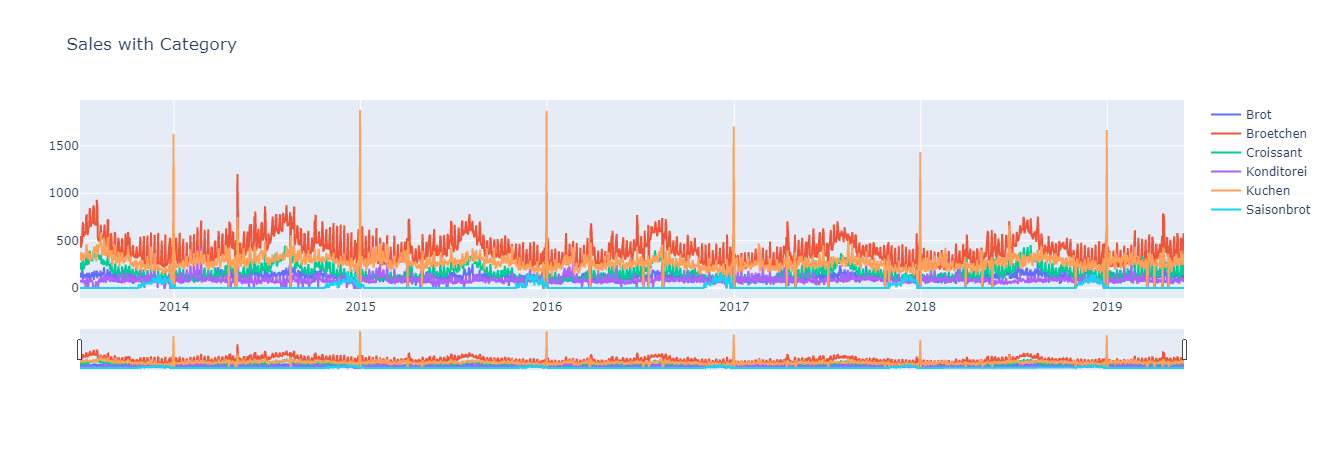

In [78]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ts_sales.index, y=ts_sales['Sales_Brot'], name="Brot"))
fig.add_trace(go.Scatter(x=ts_sales.index, y=ts_sales['Sales_Broetchen'], name="Broetchen"))
fig.add_trace(go.Scatter(x=ts_sales.index, y=ts_sales['Sales_Croissant'], name="Croissant"))
fig.add_trace(go.Scatter(x=ts_sales.index, y=ts_sales['Sales_Konditorei'], name="Konditorei"))
fig.add_trace(go.Scatter(x=ts_sales.index, y=ts_sales['Sales_Kuchen'], name="Kuchen"))
fig.add_trace(go.Scatter(x=ts_sales.index, y=ts_sales['Sales_Saisonbrot'], name="Saisonbrot"))

fig.update_layout(title_text='Sales with Category',
                  xaxis_rangeslider_visible=True)
fig.show()

### Weather

In [70]:
df_weather = pd.read_csv('../data/wetter.csv')#, header=0, parse_dates=[0], index_col=0, squeeze=True)
df_weather.set_index('Datum', inplace=True)
df_weather.fillna(0,inplace=True)
df_weather.head()

Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
Datum                                                              
2012-01-01         8.0      9.8250                   14        58.0
2012-01-02         7.0      7.4375                   12         0.0
2012-01-03         8.0      5.5375                   18        63.0
2012-01-04         4.0      5.6875                   19        80.0
2012-01-05         6.0      5.3000                   23        80.0

In [80]:
def fill_in_missing_date_index(df, fill_value = 0):
    idx = pd.date_range(min(df.index), max(df.index), freq = "D")
    df.index = pd.DatetimeIndex(df.index)    
    df = df.reindex(idx,fill_value=fill_value)
    return df

df_weather = fill_in_missing_date_index(df_weather, fill_value = 0)
df_weather.head()

Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
2012-01-01         8.0      9.8250                   14        58.0
2012-01-02         7.0      7.4375                   12         0.0
2012-01-03         8.0      5.5375                   18        63.0
2012-01-04         4.0      5.6875                   19        80.0
2012-01-05         6.0      5.3000                   23        80.0

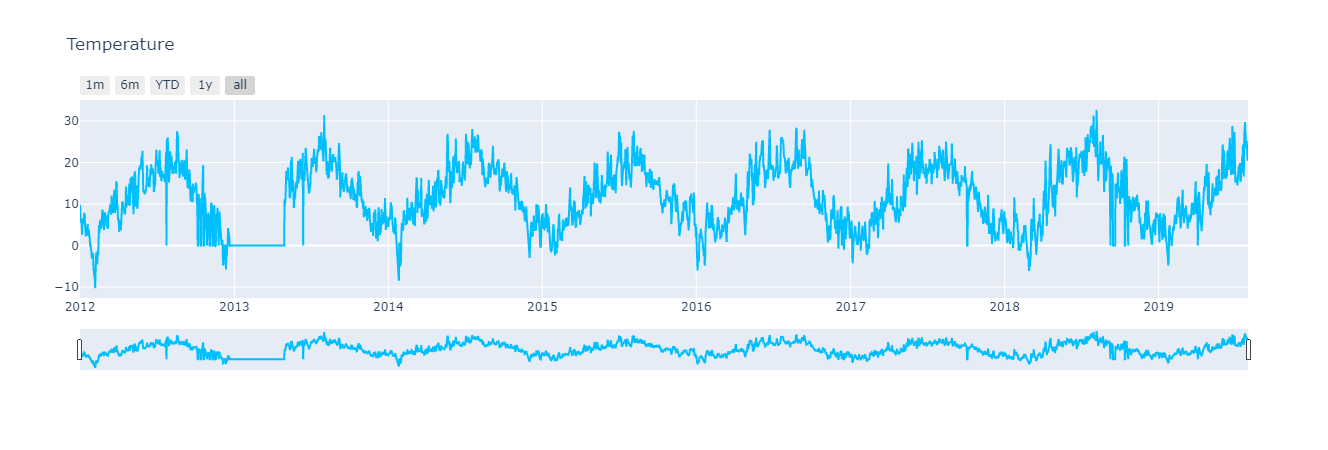

In [96]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_weather.index, y=df_weather['Temperatur'], name="AAPL High",
                         line_color='deepskyblue'))

fig.update_layout(title_text='Temperature',
                  xaxis_rangeslider_visible=True)


# Add range slider
fig.update_layout(title_text='Temperature',
    xaxis=go.layout.XAxis(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

# Holidays

In [98]:
import requests
import pandas as pd

years = range(2013, 2020, 1)

holidays = []
for year in years:
    url = 'https://ipty.de/feiertag/api.php?do=getFeiertage&jahr=' + str(year) + '&loc=SH&outformat=Y-m-d'
    holidays.append(requests.get(url).json())
    
#print(holidays)

days = {}
for years in holidays:
    days.update( {day['date']:day['title'] for day in years} )

print(days)

{'2013-01-01': 'Neujahr', '2013-03-29': 'Karfreitag', '2013-04-01': 'Ostermontag', '2013-05-01': 'Tag der Arbeit', '2013-05-09': 'Christi Himmelfahrt', '2013-05-20': 'Pfingstmontag', '2013-10-03': 'Tag der deutschen Einheit', '2013-12-25': '1. Weihnachtstag', '2013-12-26': '2. Weihnachtstag', '2014-01-01': 'Neujahr', '2014-04-18': 'Karfreitag', '2014-04-21': 'Ostermontag', '2014-05-01': 'Tag der Arbeit', '2014-05-29': 'Christi Himmelfahrt', '2014-06-09': 'Pfingstmontag', '2014-10-03': 'Tag der deutschen Einheit', '2014-12-25': '1. Weihnachtstag', '2014-12-26': '2. Weihnachtstag', '2015-01-01': 'Neujahr', '2015-04-03': 'Karfreitag', '2015-04-06': 'Ostermontag', '2015-05-01': 'Tag der Arbeit', '2015-05-14': 'Christi Himmelfahrt', '2015-05-25': 'Pfingstmontag', '2015-10-03': 'Tag der deutschen Einheit', '2015-12-25': '1. Weihnachtstag', '2015-12-26': '2. Weihnachtstag', '2016-01-01': 'Neujahr', '2016-03-25': 'Karfreitag', '2016-03-28': 'Ostermontag', '2016-05-01': 'Tag der Arbeit', '2016-

In [99]:
df_holidays = pd.DataFrame.from_dict(days, columns=['holiday'], orient='index')
#df_holidays['holiday_code'] = df_holidays['holiday'].astype("category").cat.codes
df_holidays

holiday
2013-01-01                    Neujahr
2013-03-29                 Karfreitag
2013-04-01                Ostermontag
2013-05-01             Tag der Arbeit
2013-05-09        Christi Himmelfahrt
...                               ...
2019-06-10              Pfingstmontag
2019-10-03  Tag der deutschen Einheit
2019-10-31            Reformationstag
2019-12-25           1. Weihnachtstag
2019-12-26           2. Weihnachtstag

[66 rows x 1 columns]

Missing dates:
- Valentinstag
- Ostersonntag
- Pfingstsonntag
- Halloween
- Heiligabend
- Silvester

In [100]:
df_holidays = pd.merge(df_holidays, pd.get_dummies(df_holidays, columns=['holiday']), left_index = True, right_index = True)
df_holidays.rename(columns=lambda s: s.replace('.','').replace(' ', '_').lower(), inplace=True)
df_holidays.head()

holiday  holiday_1_weihnachtstag  \
2013-01-01              Neujahr                        0   
2013-03-29           Karfreitag                        0   
2013-04-01          Ostermontag                        0   
2013-05-01       Tag der Arbeit                        0   
2013-05-09  Christi Himmelfahrt                        0   

            holiday_2_weihnachtstag  holiday_christi_himmelfahrt  \
2013-01-01                        0                            0   
2013-03-29                        0                            0   
2013-04-01                        0                            0   
2013-05-01                        0                            0   
2013-05-09                        0                            1   

            holiday_karfreitag  holiday_neujahr  holiday_ostermontag  \
2013-01-01                   0                1                    0   
2013-03-29                   1                0                    0   
2013-04-01                   0                0                    1   
2013-05-01                   0                0                    0   
2013-05-09                   0                0                    0   

            holiday_pfingstmontag  holiday_reformationstag  \
2013-01-01                      0                        0   
2013-03-29                      0                        0   
2013-04-01                      0                        0   
2013-05-01                      0                        0   
2013-05-09                      0                        0   

            holiday_tag_der_arbeit  holiday_tag_der_deutschen_einheit  
2013-01-01                       0                                  0  
2013-03-29                       0                                  0  
2013-04-01                       0                                  0  
2013-05-01                       1                                  0  
2013-05-09                       0                                  0

In [101]:
def fill_in_missing_date_index(df,date_order = 'asc', fill_value = 0):
    idx = pd.date_range(min(df.index), max(df.index), freq = "D")
    df.index = pd.DatetimeIndex(df.index)    
    df = df.reindex(idx,fill_value=fill_value)
    return df

df_holidays = fill_in_missing_date_index(df_holidays, fill_value = 0)
df_holidays.head()

holiday  holiday_1_weihnachtstag  holiday_2_weihnachtstag  \
2013-01-01  Neujahr                        0                        0   
2013-01-02        0                        0                        0   
2013-01-03        0                        0                        0   
2013-01-04        0                        0                        0   
2013-01-05        0                        0                        0   

            holiday_christi_himmelfahrt  holiday_karfreitag  holiday_neujahr  \
2013-01-01                            0                   0                1   
2013-01-02                            0                   0                0   
2013-01-03                            0                   0                0   
2013-01-04                            0                   0                0   
2013-01-05                            0                   0                0   

            holiday_ostermontag  holiday_pfingstmontag  \
2013-01-01                    0                      0   
2013-01-02                    0                      0   
2013-01-03                    0                      0   
2013-01-04                    0                      0   
2013-01-05                    0                      0   

            holiday_reformationstag  holiday_tag_der_arbeit  \
2013-01-01                        0                       0   
2013-01-02                        0                       0   
2013-01-03                        0                       0   
2013-01-04                        0                       0   
2013-01-05                        0                       0   

            holiday_tag_der_deutschen_einheit  
2013-01-01                                  0  
2013-01-02                                  0  
2013-01-03                                  0  
2013-01-04                                  0  
2013-01-05                                  0

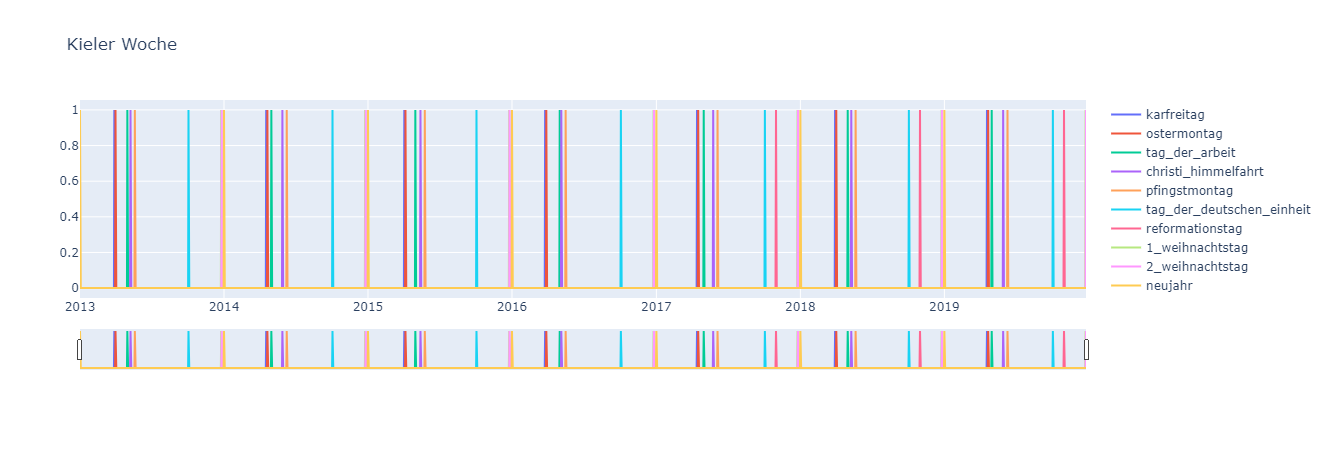

In [102]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_holidays.index, y=df_holidays['holiday_karfreitag'], name="karfreitag"))
fig.add_trace(go.Scatter(x=df_holidays.index, y=df_holidays['holiday_ostermontag'], name="ostermontag"))
fig.add_trace(go.Scatter(x=df_holidays.index, y=df_holidays['holiday_tag_der_arbeit'], name="tag_der_arbeit"))
fig.add_trace(go.Scatter(x=df_holidays.index, y=df_holidays['holiday_christi_himmelfahrt'], name="christi_himmelfahrt"))
fig.add_trace(go.Scatter(x=df_holidays.index, y=df_holidays['holiday_pfingstmontag'], name="pfingstmontag"))
fig.add_trace(go.Scatter(x=df_holidays.index, y=df_holidays['holiday_tag_der_deutschen_einheit'], name="tag_der_deutschen_einheit"))
fig.add_trace(go.Scatter(x=df_holidays.index, y=df_holidays['holiday_reformationstag'], name="reformationstag"))
fig.add_trace(go.Scatter(x=df_holidays.index, y=df_holidays['holiday_1_weihnachtstag'], name="1_weihnachtstag"))
fig.add_trace(go.Scatter(x=df_holidays.index, y=df_holidays['holiday_2_weihnachtstag'], name="2_weihnachtstag"))
fig.add_trace(go.Scatter(x=df_holidays.index, y=df_holidays['holiday_neujahr'], name="neujahr"))

fig.update_layout(title_text='Kieler Woche',
                  xaxis_rangeslider_visible=True)
fig.show()

In [103]:
# school holiday via json are only avaible from 2017 till now

school_holidays_manually = [{'start':'2013-03-25', 'end':'2013-04-09', 'name':'osterferien'}, \
        {'start':'2013-05-10', 'end':'2013-05-10', 'name':'pfingstferien'}, \
        {'start':'2013-06-24', 'end':'2013-08-03', 'name':'sommerferien'}, \
        {'start':'2013-10-21', 'end':'2013-11-02', 'name':'herbstferien'}, \
        {'start':'2013-12-23', 'end':'2014-01-04', 'name':'weihnachtsferien'}, \
        {'start':'2014-04-16', 'end':'2014-05-02', 'name':'osterferien'}, \
        {'start':'2014-05-30', 'end':'2014-05-30', 'name':'pfingstferien'}, \
        {'start':'2014-07-14', 'end':'2014-08-23', 'name':'sommerferien'}, \
        {'start':'2014-10-13', 'end':'2014-10-25', 'name':'herbstferien'}, \
        {'start':'2014-12-22', 'end':'2015-01-03', 'name':'weihnachtsferien'}, \
        {'start':'2015-04-01', 'end':'2015-04-17', 'name':'osterferien'}, \
        {'start':'2015-05-15', 'end':'2015-05-15', 'name':'pfingstferien'}, \
        {'start':'2015-07-20', 'end':'2015-08-29', 'name':'sommerferien'}, \
        {'start':'2015-10-19', 'end':'2015-10-31', 'name':'herbstferien'}, \
        {'start':'2015-12-23', 'end':'2016-01-02', 'name':'weihnachtsferien'}, \
        {'start':'2016-03-23', 'end':'2016-04-09', 'name':'osterferien'}, \
        {'start':'2016-05-06', 'end':'2016-05-06', 'name':'pfingstferien'}, \
        {'start':'2016-07-25', 'end':'2016-09-03', 'name':'sommerferien'}, \
        {'start':'2016-10-17', 'end':'2016-10-29', 'name':'herbstferien'}, \
        {'start':'2016-12-23', 'end':'2016-12-31', 'name':'weihnachtsferien'}]

periods = {}
for p in school_holidays_manually:
    date_range = pd.date_range(p['start'], p['end'], freq = "D")

    for day in date_range:
        periods.update( {day.strftime('%Y-%m-%d'):p['name']} )
            
periods

{'2013-03-25': 'osterferien',
 '2013-03-26': 'osterferien',
 '2013-03-27': 'osterferien',
 '2013-03-28': 'osterferien',
 '2013-03-29': 'osterferien',
 '2013-03-30': 'osterferien',
 '2013-03-31': 'osterferien',
 '2013-04-01': 'osterferien',
 '2013-04-02': 'osterferien',
 '2013-04-03': 'osterferien',
 '2013-04-04': 'osterferien',
 '2013-04-05': 'osterferien',
 '2013-04-06': 'osterferien',
 '2013-04-07': 'osterferien',
 '2013-04-08': 'osterferien',
 '2013-04-09': 'osterferien',
 '2013-05-10': 'pfingstferien',
 '2013-06-24': 'sommerferien',
 '2013-06-25': 'sommerferien',
 '2013-06-26': 'sommerferien',
 '2013-06-27': 'sommerferien',
 '2013-06-28': 'sommerferien',
 '2013-06-29': 'sommerferien',
 '2013-06-30': 'sommerferien',
 '2013-07-01': 'sommerferien',
 '2013-07-02': 'sommerferien',
 '2013-07-03': 'sommerferien',
 '2013-07-04': 'sommerferien',
 '2013-07-05': 'sommerferien',
 '2013-07-06': 'sommerferien',
 '2013-07-07': 'sommerferien',
 '2013-07-08': 'sommerferien',
 '2013-07-09': 'sommerf

In [104]:
# school holiday get online

years = range(2017, 2020, 1)

school_holidays = []
for year in years:
    url = 'https://ferien-api.de/api/v1/holidays/SH/' + str(year)
    school_holidays.append(requests.get(url).json())
    
#print(school_holidays)

for years in school_holidays:
    for p in years:
        date_range = pd.date_range(p['start'], p['end'], freq = "D")
        
        for day in date_range:
            periods.update( {day.strftime('%Y-%m-%d'):p['name']} )
            
periods

{'2013-03-25': 'osterferien',
 '2013-03-26': 'osterferien',
 '2013-03-27': 'osterferien',
 '2013-03-28': 'osterferien',
 '2013-03-29': 'osterferien',
 '2013-03-30': 'osterferien',
 '2013-03-31': 'osterferien',
 '2013-04-01': 'osterferien',
 '2013-04-02': 'osterferien',
 '2013-04-03': 'osterferien',
 '2013-04-04': 'osterferien',
 '2013-04-05': 'osterferien',
 '2013-04-06': 'osterferien',
 '2013-04-07': 'osterferien',
 '2013-04-08': 'osterferien',
 '2013-04-09': 'osterferien',
 '2013-05-10': 'pfingstferien',
 '2013-06-24': 'sommerferien',
 '2013-06-25': 'sommerferien',
 '2013-06-26': 'sommerferien',
 '2013-06-27': 'sommerferien',
 '2013-06-28': 'sommerferien',
 '2013-06-29': 'sommerferien',
 '2013-06-30': 'sommerferien',
 '2013-07-01': 'sommerferien',
 '2013-07-02': 'sommerferien',
 '2013-07-03': 'sommerferien',
 '2013-07-04': 'sommerferien',
 '2013-07-05': 'sommerferien',
 '2013-07-06': 'sommerferien',
 '2013-07-07': 'sommerferien',
 '2013-07-08': 'sommerferien',
 '2013-07-09': 'sommerf

In [105]:
df_school_holidays = pd.DataFrame.from_dict(periods, columns=['school_holiday'], orient='index')
df_school_holidays

school_holiday
2013-03-25       osterferien
2013-03-26       osterferien
2013-03-27       osterferien
2013-03-28       osterferien
2013-03-29       osterferien
...                      ...
2020-01-03  weihnachtsferien
2020-01-04  weihnachtsferien
2020-01-05  weihnachtsferien
2020-01-06  weihnachtsferien
2020-01-07  weihnachtsferien

[614 rows x 1 columns]

In [106]:
df_school_holidays = pd.merge(df_school_holidays, pd.get_dummies(df_school_holidays, columns=['school_holiday']), left_index = True, right_index = True)
df_school_holidays.rename(columns=lambda s: s.replace('.','').replace(' ', '_').lower(), inplace=True)
df_school_holidays.head()

school_holiday  school_holiday_herbstferien  \
2013-03-25    osterferien                            0   
2013-03-26    osterferien                            0   
2013-03-27    osterferien                            0   
2013-03-28    osterferien                            0   
2013-03-29    osterferien                            0   

            school_holiday_osterferien  school_holiday_pfingstferien  \
2013-03-25                           1                             0   
2013-03-26                           1                             0   
2013-03-27                           1                             0   
2013-03-28                           1                             0   
2013-03-29                           1                             0   

            school_holiday_sommerferien  school_holiday_weihnachtsferien  
2013-03-25                            0                                0  
2013-03-26                            0                                0  
2013-03-27                            0                                0  
2013-03-28                            0                                0  
2013-03-29                            0                                0

In [107]:
def fill_in_missing_date_index(df,date_order = 'asc', fill_value = 0):
    idx = pd.date_range(min(df.index), max(df.index), freq = "D")
    df.index = pd.DatetimeIndex(df.index)    
    df = df.reindex(idx,fill_value=fill_value)
    return df

df_school_holidays = fill_in_missing_date_index(df_school_holidays, fill_value = 0)
df_school_holidays.head()

school_holiday  school_holiday_herbstferien  \
2013-03-25    osterferien                            0   
2013-03-26    osterferien                            0   
2013-03-27    osterferien                            0   
2013-03-28    osterferien                            0   
2013-03-29    osterferien                            0   

            school_holiday_osterferien  school_holiday_pfingstferien  \
2013-03-25                           1                             0   
2013-03-26                           1                             0   
2013-03-27                           1                             0   
2013-03-28                           1                             0   
2013-03-29                           1                             0   

            school_holiday_sommerferien  school_holiday_weihnachtsferien  
2013-03-25                            0                                0  
2013-03-26                            0                                0  
2013-03-27                            0                                0  
2013-03-28                            0                                0  
2013-03-29                            0                                0

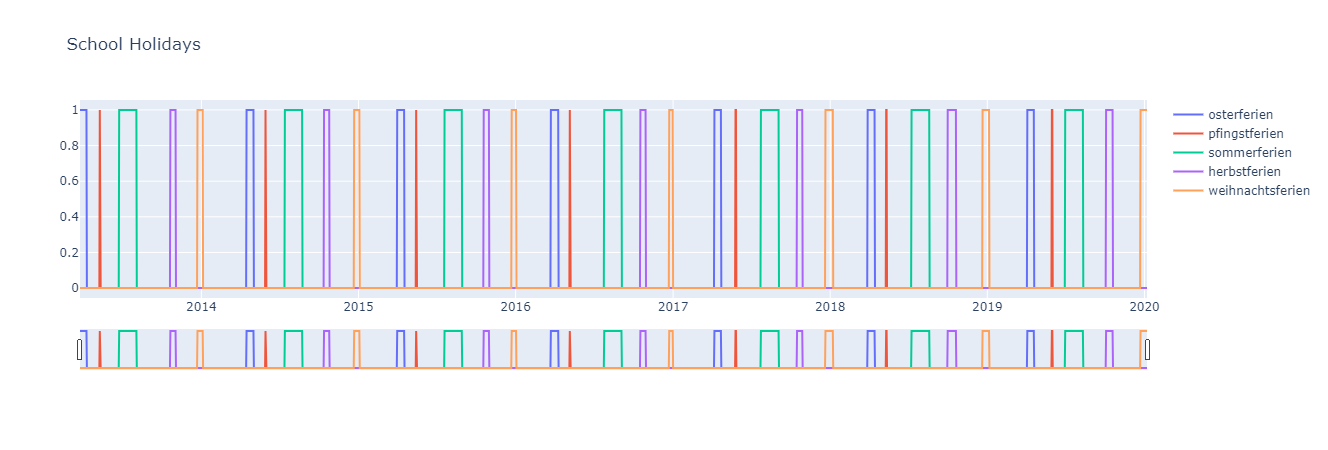

In [108]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_school_holidays.index, y=df_school_holidays['school_holiday_osterferien'], name="osterferien"))
fig.add_trace(go.Scatter(x=df_school_holidays.index, y=df_school_holidays['school_holiday_pfingstferien'], name="pfingstferien"))
fig.add_trace(go.Scatter(x=df_school_holidays.index, y=df_school_holidays['school_holiday_sommerferien'], name="sommerferien"))
fig.add_trace(go.Scatter(x=df_school_holidays.index, y=df_school_holidays['school_holiday_herbstferien'], name="herbstferien"))
fig.add_trace(go.Scatter(x=df_school_holidays.index, y=df_school_holidays['school_holiday_weihnachtsferien'], name="weihnachtsferien"))

fig.update_layout(title_text='School Holidays',
                  xaxis_rangeslider_visible=True)
fig.show()

# Merge all data

In [110]:
df_list = [df_sales, df_weather, df_kiwo, df_holidays, df_school_holidays]

date_min = []
date_max = []

for df in df_list:
    date_min.append(min(df.index))
    date_max.append(max(df.index))
    
date_min = max(date_min)
date_max = min(date_max)

from functools import reduce

df_all = reduce(lambda left, right: pd.merge(left[date_min : date_max], right[date_min : date_max], left_index = True, right_index = True), df_list)
df_all.head()


Sales_Brot  Sales_Broetchen  Sales_Croissant  Sales_Konditorei  \
2013-07-01  148.828353       535.856285       201.198426         65.890169   
2013-07-02  159.793757       546.780787       265.261254         74.543917   
2013-07-03  111.885594       427.343259       210.260241         69.262728   
2013-07-04  168.864941       454.859641       190.686641         61.490175   
2013-07-05  171.280754       492.818804       181.644870         86.759861   

            Sales_Kuchen  Sales_Saisonbrot  Bewoelkung  Temperatur  \
2013-07-01    317.475875               0.0         6.0     17.8375   
2013-07-02    383.628682               0.0         3.0     17.3125   
2013-07-03    305.523072               0.0         7.0     21.0750   
2013-07-04    308.408168               0.0         7.0     18.8500   
2013-07-05    355.518770               0.0         5.0     19.9750   

            Windgeschwindigkeit  Wettercode  ...  holiday_pfingstmontag  \
2013-07-01                   15        20.0  ...                      0   
2013-07-02                   10         0.0  ...                      0   
2013-07-03                    6        61.0  ...                      0   
2013-07-04                    7        20.0  ...                      0   
2013-07-05                   12         0.0  ...                      0   

           holiday_reformationstag  holiday_tag_der_arbeit  \
2013-07-01                       0                       0   
2013-07-02                       0                       0   
2013-07-03                       0                       0   
2013-07-04                       0                       0   
2013-07-05                       0                       0   

            holiday_tag_der_deutschen_einheit  school_holiday  \
2013-07-01                                  0    sommerferien   
2013-07-02                                  0    sommerferien   
2013-07-03                                  0    sommerferien   
2013-07-04                                  0    sommerferien   
2013-07-05                                  0    sommerferien   

            school_holiday_herbstferien  school_holiday_osterferien  \
2013-07-01                            0                           0   
2013-07-02                            0                           0   
2013-07-03                            0                           0   
2013-07-04                            0                           0   
2013-07-05                            0                           0   

            school_holiday_pfingstferien  school_holiday_sommerferien  \
2013-07-01                             0                            1   
2013-07-02                             0                            1   
2013-07-03                             0                            1   
2013-07-04                             0                            1   
2013-07-05                             0                            1   

            school_holiday_weihnachtsferien  
2013-07-01                                0  
2013-07-02                                0  
2013-07-03                                0  
2013-07-04                                0  
2013-07-05                                0  

[5 rows x 28 columns]

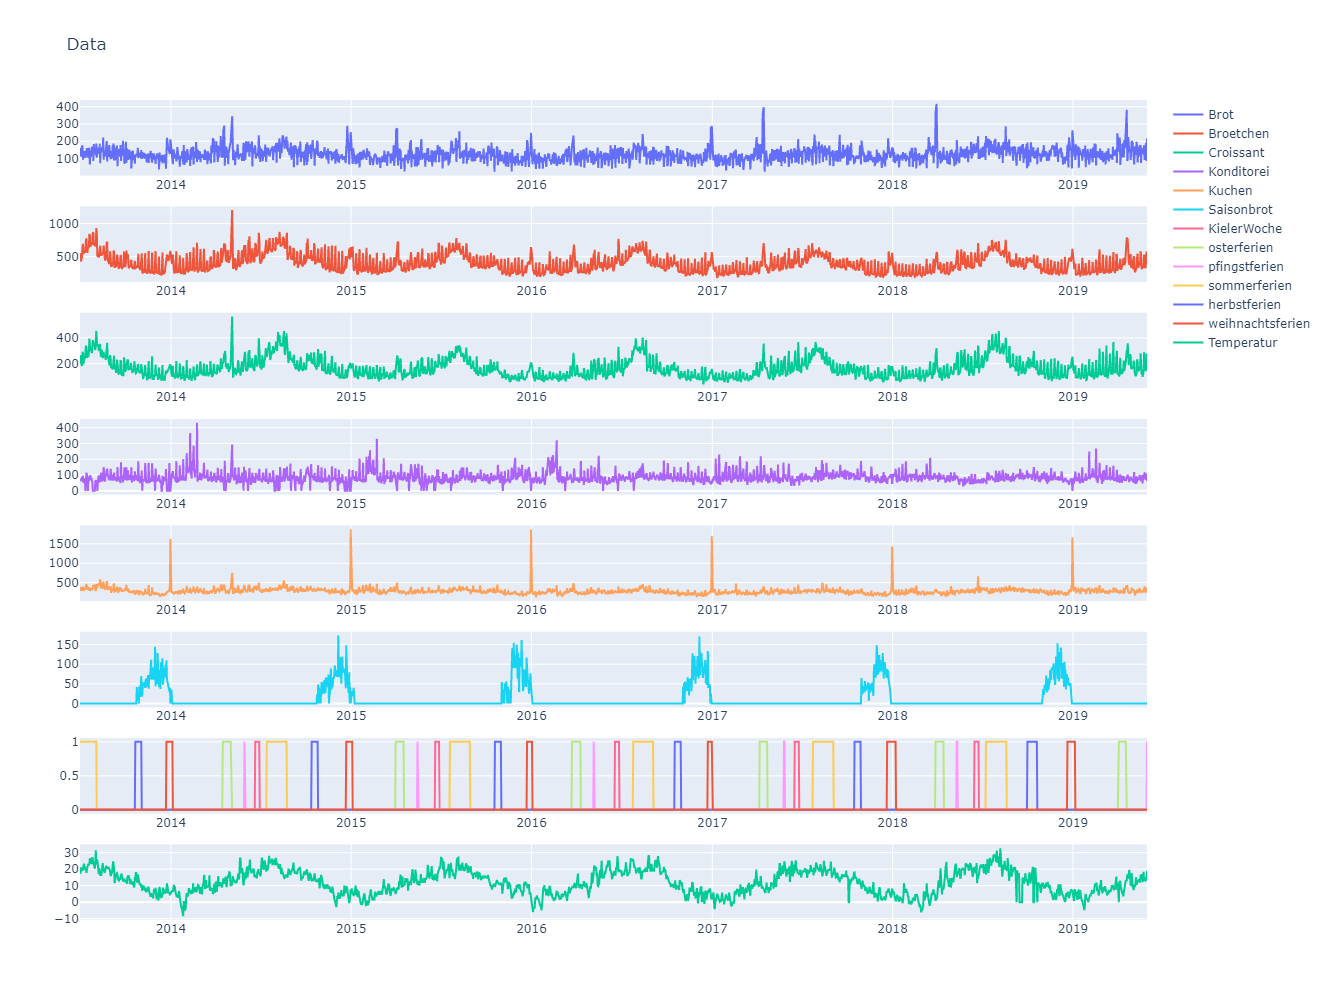

In [117]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=8, cols=1)

fig.add_trace(go.Scatter(x=df_all.index, y=df_all['Sales_Brot'], name="Brot"), row=1, col=1)
fig.add_trace(go.Scatter(x=df_all.index, y=df_all['Sales_Broetchen'], name="Broetchen"), row=2, col=1)
fig.add_trace(go.Scatter(x=df_all.index, y=df_all['Sales_Croissant'], name="Croissant"), row=3, col=1)
fig.add_trace(go.Scatter(x=df_all.index, y=df_all['Sales_Konditorei'], name="Konditorei"), row=4, col=1)
fig.add_trace(go.Scatter(x=df_all.index, y=df_all['Sales_Kuchen'], name="Kuchen"), row=5, col=1)
fig.add_trace(go.Scatter(x=df_all.index, y=df_all['Sales_Saisonbrot'], name="Saisonbrot"), row=6, col=1)

fig.add_trace(go.Scatter(x=df_all.index, y=df_all['KielerWoche'], name="KielerWoche"), row=7, col=1)
fig.add_trace(go.Scatter(x=df_all.index, y=df_all['school_holiday_osterferien'], name="osterferien"), row=7, col=1)
fig.add_trace(go.Scatter(x=df_all.index, y=df_all['school_holiday_pfingstferien'], name="pfingstferien"), row=7, col=1)
fig.add_trace(go.Scatter(x=df_all.index, y=df_all['school_holiday_sommerferien'], name="sommerferien"), row=7, col=1)
fig.add_trace(go.Scatter(x=df_all.index, y=df_all['school_holiday_herbstferien'], name="herbstferien"), row=7, col=1)
fig.add_trace(go.Scatter(x=df_all.index, y=df_all['school_holiday_weihnachtsferien'], name="weihnachtsferien"), row=7, col=1)

fig.add_trace(go.Scatter(x=df_all.index, y=df_all['Temperatur'], name="Temperatur"), row=8, col=1)

fig.update_layout(title_text='Data',height=1000)

fig.show()

In [126]:
df_all['weekday'] = df_all.index.dayofweek
df_all['month'] = df_all.index.month
df_all['day'] = df_all.index.day
df_all['year'] = df_all.index.day

In [127]:
df_all

Sales_Brot  Sales_Broetchen  Sales_Croissant  Sales_Konditorei  \
2013-07-01  148.828353       535.856285       201.198426         65.890169   
2013-07-02  159.793757       546.780787       265.261254         74.543917   
2013-07-03  111.885594       427.343259       210.260241         69.262728   
2013-07-04  168.864941       454.859641       190.686641         61.490175   
2013-07-05  171.280754       492.818804       181.644870         86.759861   
...                ...              ...              ...               ...   
2019-05-27  135.089885       343.556064       148.559756        108.839265   
2019-05-28  154.363980       325.469954       143.560611         69.413548   
2019-05-29  190.850121       410.842197       150.235794         85.864240   
2019-05-30   85.145930       577.007683       278.094458        109.264552   
2019-05-31  215.454052       531.418072       238.703043         62.585166   

            Sales_Kuchen  Sales_Saisonbrot  Bewoelkung  Temperatur  \
2013-07-01    317.475875               0.0         6.0     17.8375   
2013-07-02    383.628682               0.0         3.0     17.3125   
2013-07-03    305.523072               0.0         7.0     21.0750   
2013-07-04    308.408168               0.0         7.0     18.8500   
2013-07-05    355.518770               0.0         5.0     19.9750   
...                  ...               ...         ...         ...   
2019-05-27    319.487926               0.0         6.0     15.2625   
2019-05-28    244.543724               0.0         6.0     13.1625   
2019-05-29    261.402964               0.0         3.0     13.3625   
2019-05-30    358.531072               0.0         7.0     14.0125   
2019-05-31    290.409849               0.0         7.0     18.8500   

            Windgeschwindigkeit  Wettercode  ...  school_holiday  \
2013-07-01                   15        20.0  ...    sommerferien   
2013-07-02                   10         0.0  ...    sommerferien   
2013-07-03                    6        61.0  ...    sommerferien   
2013-07-04                    7        20.0  ...    sommerferien   
2013-07-05                   12         0.0  ...    sommerferien   
...                         ...         ...  ...             ...   
2019-05-27                   13         0.0  ...               0   
2019-05-28                   12         0.0  ...               0   
2019-05-29                    8         0.0  ...               0   
2019-05-30                    9        61.0  ...               0   
2019-05-31                   14         0.0  ...   pfingstferien   

           school_holiday_herbstferien  school_holiday_osterferien  \
2013-07-01                           0                           0   
2013-07-02                           0                           0   
2013-07-03                           0                           0   
2013-07-04                           0                           0   
2013-07-05                           0                           0   
...                                ...                         ...   
2019-05-27                           0                           0   
2019-05-28                           0                           0   
2019-05-29                           0                           0   
2019-05-30                           0                           0   
2019-05-31                           0                           0   

            school_holiday_pfingstferien  school_holiday_sommerferien  \
2013-07-01                             0                            1   
2013-07-02                             0                            1   
2013-07-03                             0                            1   
2013-07-04                             0                            1   
2013-07-05                             0                            1   
...                                  ...                          ...   
2019-05-27                             0                         

# Create CSV of all merged data

In [ ]:
df_all.to_csv(r'../data/merged_data.csv')